In [1]:
%run init.ipynb

# Algoritmo de Bernstein-Vazirani

Vamos considerar uma função $f:\{0,1\}^{n}\rightarrow \{0,1\}$. Ou seja, $f$ tem como input sequências $x=x_{n-1}\cdots x_{1}x_{0}$ com $x_{j}=0$ ou $x_{j}=1$ e tem como output 0 ou 1. Vamos considerar um oráculo que contém uma __sequência secreta__ de bits $$s=s_{n-1}\cdots s_{1}s_{0}$$ e que, em cada _query_ nos retorna
$$f(x) = s\cdot x(\mod2) = \sum_{j=0}^{n-1}s_{j}x_{j}(\mod2).$$ O problema a ser resolvido é encontrar $s$.

Como cada pergunta ao oráculo nos fornece um único escalar como resposta, classicamente o melhor que podemos fazer é fazer as seguintes $n$ perguntas:
\begin{align}
& f(100\cdots 00) = s_{n-1}, \\
& f(010\cdots 00) = s_{n-2}, \\
& f(001\cdots 00) = s_{n-3}, \\
& \vdots \\
& f(000\cdots 10) = s_{1}, \\
& f(000\cdots 01) = s_{0}.
\end{align}
Como exemplo, consideremos $n=3$ e $s=101$. Teremos que 
\begin{align}
& f(100) = 1s_{2}+0s_{1}+0s_{0} = s_{2},\\
& f(010) = 0s_{2}+1s_{1}+0s_{0} = s_{1}, \\
& f(001) = 0s_{2}+0s_{1}+1s_{0} = s_{0}.
\end{align}

In [34]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

In [57]:
#secretnumber = '101001'
secretnumber = '1110001' # general

In [58]:
#circuit = QuantumCircuit(6+1,6)
circuit = QuantumCircuit(len(secretnumber)+1,len(secretnumber))

#circuit.h([0,1,2,3,4,5]);
circuit.h(range(len(secretnumber)))
#circuit.x(6);
circuit.x(len(secretnumber));
#circuit.h(6);
circuit.h(len(secretnumber));

circuit.barrier();

for ii, yesno in enumerate(reversed(secretnumber)): # the black box
    if yesno == '1':
        circuit.cx(ii, len(secretnumber));
'''circuit.cx(5, 6);
circuit.cx(3, 6);
circuit.cx(0, 6);'''
        
circuit.barrier();

#circuit.h([0,1,2,3,4,5]);
circuit.h(range(len(secretnumber)));

circuit.barrier();

#circuit.measure([0,1,2,3,4,5],[0,1,2,3,4,5]);
circuit.measure(range(len(secretnumber)),range(len(secretnumber)));

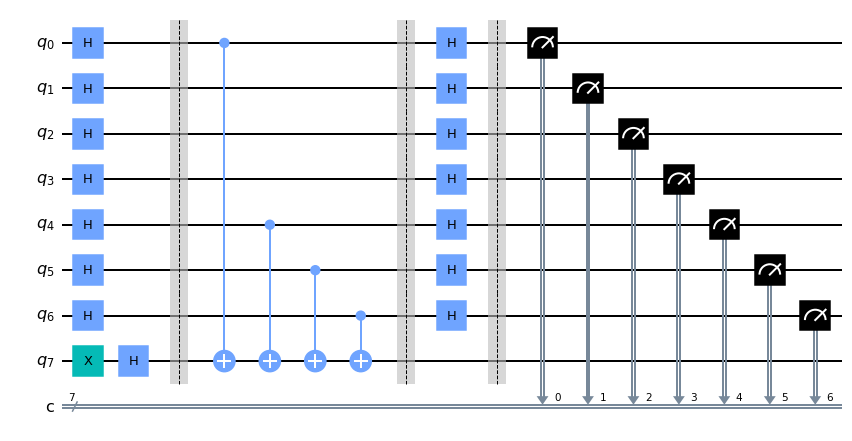

In [59]:
circuit.draw(output='mpl')

In [60]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'1110001': 1}
